# Convolutional Neural Network (No. Detection)

In [1]:
# import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

In [3]:
# split data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


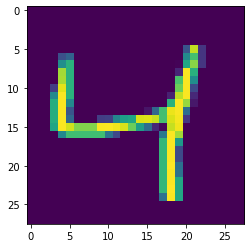

In [4]:
plt.imshow(x_train[2])


## Process Data

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [6]:
print (x_train.shape, x_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
#convert input to type float32 and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [8]:
print (y_train.shape)


(60000,)


In [9]:
# convert class vectors to binary class matrices
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


## Define Model

In [10]:
batch_size = 128
epochs = 5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

## Compile Model

In [12]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])


## Fit data to Model

In [13]:
hist = model.fit(x_train, y_train, batch_size=batch_size, 
                 epochs=epochs,verbose=1,
                 validation_data=(x_test, y_test))
print("The model has successfully trained")
# saving model
model.save('mnist.h5')
print("Saving the model as mnist.h5")


Epoch 1/5
469/469 [==============================] - 86s 181ms/step - loss: 0.1937 - accuracy: 0.9402 - val_loss: 0.0462 - val_accuracy: 0.9840
Epoch 2/5
469/469 [==============================] - 98s 208ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 3/5
469/469 [==============================] - 97s 207ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0331 - val_accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 92s 196ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0266 - val_accuracy: 0.9910
Epoch 5/5
469/469 [==============================] - 87s 186ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0279 - val_accuracy: 0.9914
The model has successfully trained
Saving the model as mnist.h5


## Evaluate Model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.027903147041797638
Test accuracy: 0.9914000034332275


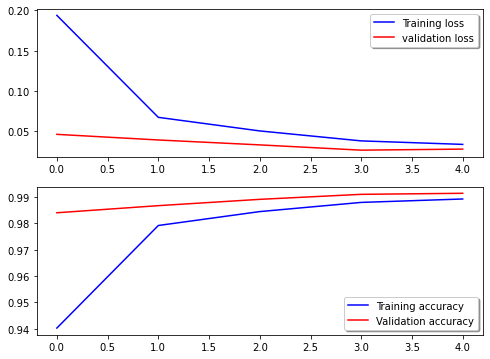

In [15]:
fig, ax = plt.subplots(2,1, figsize=(8, 6))
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', 
           label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',
           label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## Prediction

313/313 [==============================] - 4s 11ms/step


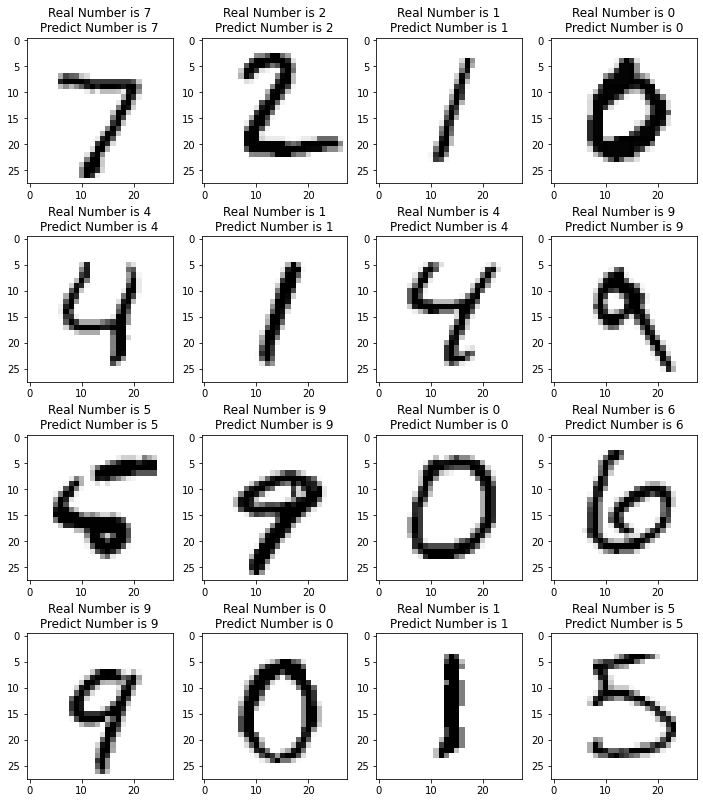

In [16]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}")


## Single digit prediction

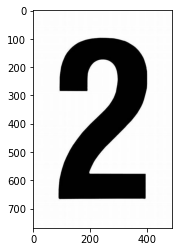

In [19]:
import tensorflow as tf
import cv2  as cv
from matplotlib import pyplot as plt
img=cv.imread('no5.jpg')
plt.imshow(img)


In [20]:
img.shape


(768, 490, 3)

In [21]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (28, 28))


In [22]:
img.shape


(28, 28)

In [23]:
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
model = keras.models.load_model('mnist.h5')


In [24]:
model.input_shape


(None, 28, 28, 1)

In [25]:
import numpy as np
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = np.argmax(model.predict(x))
print(preds)


1/1 [==============================] - 0s 73ms/step
2
